In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def change_brightness(image, brightness_factor):
    """
    Изменение яркости изображения.
    """
    return cv2.convertScaleAbs(image, beta=brightness_factor)

def change_channel_intensity(image, channel, intensity_factor):
    """
    Изменение интенсивности одного из цветовых каналов.
    """
    b, g, r = cv2.split(image)
    if channel == 'r':
        r = cv2.convertScaleAbs(r, beta=intensity_factor)
    elif channel == 'g':
        g = cv2.convertScaleAbs(g, beta=intensity_factor)
    elif channel == 'b':
        b = cv2.convertScaleAbs(b, beta=intensity_factor)
    return cv2.merge((b, g, r))

def change_contrast(image, contrast_factor):
    """
    Изменение контрастности изображения.
    """
    return cv2.convertScaleAbs(image, alpha=contrast_factor)

def invert_image(image):
    """
    Получение негатива изображения.
    """
    return cv2.bitwise_not(image)

def swap_channels(image, channel1, channel2):
    """
    Обмен цветовыми каналами.
    """
    b, g, r = cv2.split(image)
    if channel1 == 'r' and channel2 == 'g':
        return cv2.merge((g, b, r))
    elif channel1 == 'r' and channel2 == 'b':
        return cv2.merge((r, g, b))
    elif channel1 == 'g' and channel2 == 'b':
        return cv2.merge((r, b, g))
    elif channel1 == 'g' and channel2 == 'r':
        return cv2.merge((b, r, g))
    elif channel1 == 'b' and channel2 == 'r':
        return cv2.merge((g, r, b))
    elif channel1 == 'b' and channel2 == 'g':
        return cv2.merge((r, b, g))
    else:
        return image

def flip_image(image, flip_code):
    """
    Отражение изображения.
    """
    return cv2.flip(image, flip_code)

def blur_image(image, kernel_size):
    """
    Размытие изображения.
    """
    return cv2.blur(image, (kernel_size, kernel_size))

# Загрузка изображения
image = cv2.imread('image.png')

# Увеличение/уменьшение интенсивности яркости
brightened_image = change_brightness(image, brightness_factor=50)
darkened_image = change_brightness(image, brightness_factor=-50)

# Повышение/снижение контрастности изображения
high_contrast_image = change_contrast(image, contrast_factor=2.0)
low_contrast_image = change_contrast(image, contrast_factor=0.5)

# Получение негатива яркости или цветовых каналов
inverted_image = invert_image(image)

# Обмен цветовыми каналами
swapped_channels_image = swap_channels(image, 'r', 'b')

# Выполнение симметричного отображения изображения по горизонтали или вертикали
flipped_horizontally_image = flip_image(image, 1)  # Отражение по горизонтали
flipped_vertically_image = flip_image(image, 0)  # Отражение по вертикали

# Выполнение удаления шума методом размытия изображения
blurred_image = blur_image(image, kernel_size=5)

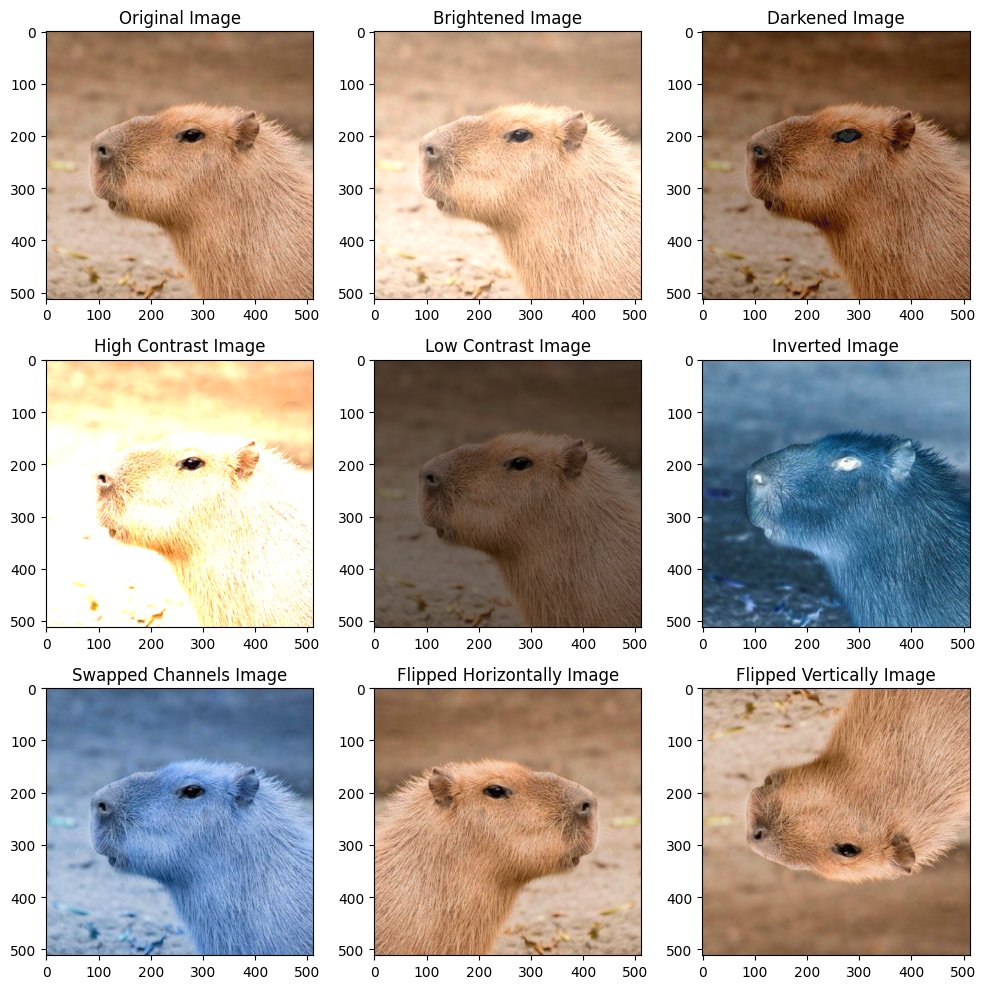

In [4]:
# Отображение результатов
plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(brightened_image, cv2.COLOR_BGR2RGB))
plt.title('Brightened Image')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(darkened_image, cv2.COLOR_BGR2RGB))
plt.title('Darkened Image')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(high_contrast_image, cv2.COLOR_BGR2RGB))
plt.title('High Contrast Image')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(low_contrast_image, cv2.COLOR_BGR2RGB))
plt.title('Low Contrast Image')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.title('Inverted Image')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(swapped_channels_image, cv2.COLOR_BGR2RGB))
plt.title('Swapped Channels Image')

plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(flipped_horizontally_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Horizontally Image')

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(flipped_vertically_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Vertically Image')

plt.tight_layout()
plt.show()

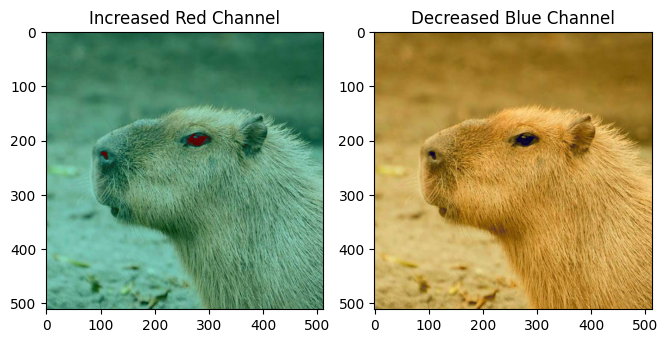

In [5]:
# Отображение результатов
plt.figure(figsize=(10, 10))

# Увеличение/уменьшение интенсивности отдельных цветовых каналов
increased_red_channel = change_channel_intensity(image, 'r', intensity_factor=-100)
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(increased_red_channel, cv2.COLOR_BGR2RGB))
plt.title('Increased Red Channel')

decreased_blue_channel = change_channel_intensity(image, 'b', intensity_factor=-50)
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(decreased_blue_channel, cv2.COLOR_BGR2RGB))
plt.title('Decreased Blue Channel')

plt.tight_layout()
plt.show()

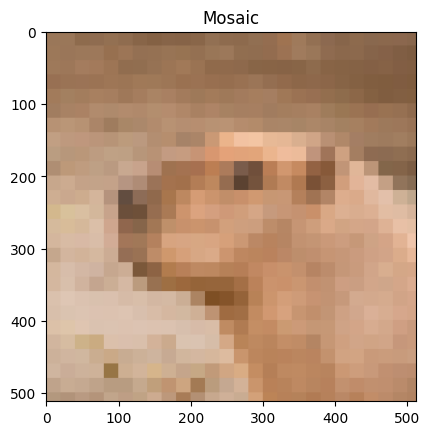

In [6]:
def create_mosaic(image, block_size):
    """
    Создает мозаику на изображении.
    """
    height, width = image.shape[:2]
    mosaic_image = image.copy()

    for y in range(0, height, block_size):
        for x in range(0, width, block_size):
            block = image[y:y+block_size, x:x+block_size]
            mean_color = np.mean(block, axis=(0, 1)).astype(int)
            mosaic_image[y:y+block_size, x:x+block_size] = mean_color

    return mosaic_image

mosaic_image = create_mosaic(image, block_size=20)

plt.imshow(cv2.cvtColor(mosaic_image, cv2.COLOR_BGR2RGB))
plt.title('Mosaic')
plt.show()

In [7]:
def swap_channels(image, source, destination):
    # Создаем карту каналов
    channel_map = {'r': 2, 'g': 1, 'b': 0}
    
    # Копируем исходное изображение, чтобы не менять его
    result_image = image.copy()
    
    # Получаем индексы каналов для обмена
    src_index = channel_map[source.lower()]
    dest_index = channel_map[destination.lower()]
    
    # Меняем каналы местами
    result_image[:, :, src_index], result_image[:, :, dest_index] = image[:, :, dest_index], image[:, :, src_index].copy()
    
    return result_image

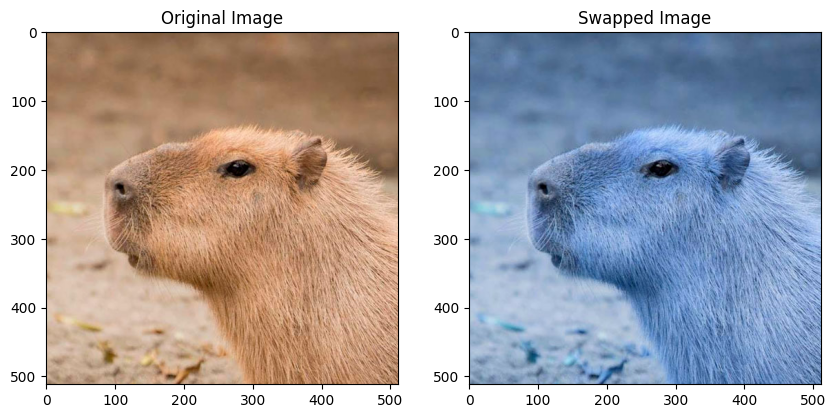

In [12]:
# Меняем каналы местами: красный с зеленым
swapped_image = swap_channels(image, 'r', 'b')

# Визуализация
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(swapped_image, cv2.COLOR_BGR2RGB))
plt.title('Swapped Image')

plt.show()